In [12]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("C:\\Users\\sumat\\Desktop\\GSI Suman\\Code\\New folder\\output_reflectance4.csv")

print(data.head())

   File Name  356.0  366.0  376.0  386.0  396.0  406.0  416.0  426.0  436.0  \
0  D1GB1.csv  28.85  25.03  20.18  16.29  16.25  13.77  13.90  13.66  13.03   
1  D1GB2.csv  29.34  24.67  19.33  15.57  15.60  13.14  13.39  12.97  12.34   
2  D1GS1.csv  34.83  29.01  22.76  17.90  17.87  14.91  15.42  15.65  15.24   
3  D1GS2.csv  36.25  30.23  23.91  19.12  18.83  15.72  16.15  16.27  15.67   
4  D1GS3.csv  32.55  27.56  21.11  16.76  17.63  14.43  14.56  14.12  13.32   

   ...  2416.0  2426.0  2436.0  2446.0  2456.0  2466.0  2476.0  2486.0  \
0  ...    8.01    7.48    7.32    7.16    7.24    6.90    6.70    6.71   
1  ...    7.94    7.73    7.74    7.12    7.32    7.02    6.99    6.86   
2  ...   12.79   12.18   11.94   11.59   11.20   10.70   11.11   10.23   
3  ...   12.94   12.39   12.22   11.66   11.64   11.19   10.83   10.46   
4  ...   12.72   12.05   12.01   11.35   11.11   10.51   10.40   10.38   

   2496.0  2506.0  
0    6.27    6.25  
1    7.34    6.40  
2   10.40    9.71  


In [14]:
# Drop the 'File Name' column as it is not needed for PCA
data = data.drop(columns=['File Name'])

# Convert the data to a numpy array
reflectance_data = data.values

# Normalize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
reflectance_data_scaled = scaler.fit_transform(reflectance_data)

In [15]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components
pca.fit(reflectance_data_scaled)

# Transform the data to the principal components
reflectance_pca = pca.transform(reflectance_data_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.88972735 0.05081338]


In [16]:
# Get the loadings (coefficients) of the original wavelengths on the PCs
loadings = pca.components_

# The loadings matrix has shape (n_components, n_features)
# Each row corresponds to a principal component, and each column corresponds to a wavelength
print("Loadings:", loadings)

# Identify the wavelengths with the highest absolute loadings for the first principal component
important_wavelengths = loadings[0].argsort()[::-1][:10]  # Adjust the number of wavelengths as needed
print("Most Important Wavelengths:", important_wavelengths)

Loadings: [[ 0.06799531  0.06779972  0.067078    0.0660573   0.06602205  0.06495949
   0.06507628  0.06452911  0.06376794  0.06379797  0.06317534  0.06243769
   0.06226063  0.06122418  0.06021168  0.0590558   0.05760612  0.05639558
   0.05588388  0.05563375  0.0553882   0.0556095   0.05625332  0.057218
   0.05846701  0.05995857  0.06089911  0.0611038   0.05919603  0.05510593
   0.04997872  0.04524496  0.04144081  0.04268077  0.05417763  0.06194535
   0.06462098  0.06557901  0.06602671  0.0664025   0.06657805  0.06680391
   0.06695972  0.06705265  0.06703628  0.06704808  0.0671452   0.067252
   0.06746     0.06763375  0.06771402  0.06772913  0.06773455  0.06772882
   0.06769053  0.06770542  0.06772964  0.06785057  0.0680731   0.06830482
   0.06852725  0.06868108  0.06869942  0.06886194  0.06911012  0.06912107
   0.06906811  0.0690017   0.06887849  0.06877745  0.068723    0.06868693
   0.06868386  0.06873463  0.06881023  0.06890167  0.06898346  0.0690855
   0.06926213  0.06947325  0.0696

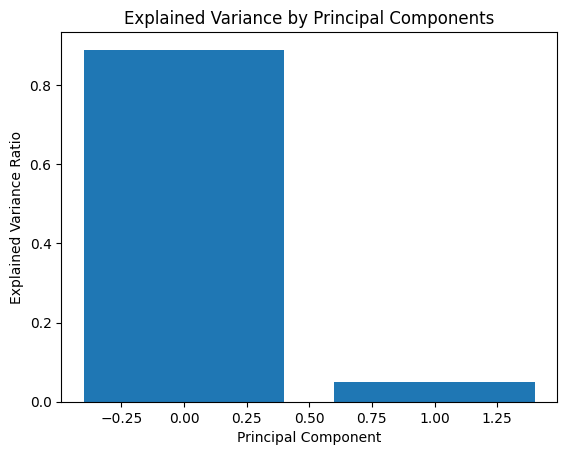

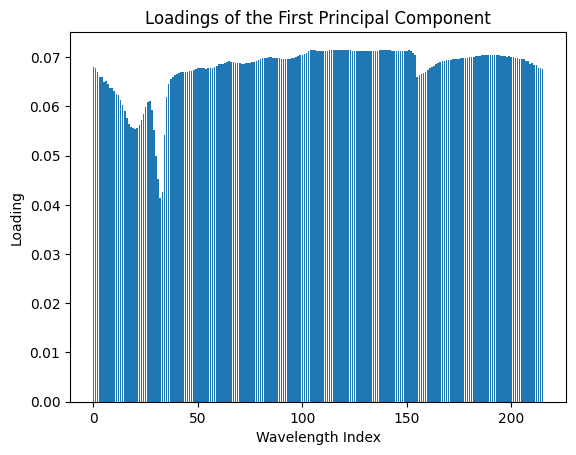

In [17]:
import matplotlib.pyplot as plt

# Plot the explained variance
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Plot the loadings of the first principal component
plt.bar(range(len(loadings[0])), loadings[0])
plt.xlabel('Wavelength Index')
plt.ylabel('Loading')
plt.title('Loadings of the First Principal Component')
plt.show()

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the CSV file
file_path = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Code\\New folder\\output_reflectance4.csv" # Replace with the path to your file
# file_path ="C:\\Users\\sumat\\Desktop\\GSI Suman\\pravakar\\Filter data of Green apple\\Merged data\\merged_wavelength_reflectance 03-10-24.csv"
data = pd.read_csv(file_path)

# Inspect the data
print("First few rows of the dataset:")
print(data.head())
data=data.iloc[:9, 1:].values.astype(float)
# Ensure the data has wavelengths as columns and samples as rows
# Drop rows or columns with missing values (if any)
# data_cleaned = data.dropna()

# Extract reflectance values (exclude non-numeric columns like sample IDs)
reflectance_matrix = data_cleaned.iloc[:, 1:].values  # Adjust slicing as per your dataset
wavelengths = data_cleaned.columns[1:]  # Extract wavelength column names

# Normalize the reflectance data (standardize: mean=0, std=1)
reflectance_normalized = (reflectance_matrix - np.mean(reflectance_matrix, axis=0)) / np.std(reflectance_matrix, axis=0)

# Perform PCA
pca = PCA()
pca.fit(reflectance_normalized)

# Extract explained variance and principal components
explained_variance = pca.explained_variance_ratio_
principal_components = pca.components_

# Identify important wavelengths contributing to the first principal component
loading_scores = principal_components[0]  # First principal component loadings
important_wavelengths = list(zip(wavelengths, loading_scores))

# Sort wavelengths by their absolute contribution to the first principal component
important_wavelengths_sorted = sorted(important_wavelengths, key=lambda x: abs(x[1]), reverse=True)

# Output explained variance and top 10 important wavelengths
print("Explained Variance by Principal Components:")
print(explained_variance)

print("\nTop 10 Important Wavelengths (First Principal Component):")
for wavelength, score in important_wavelengths_sorted[:10]:
    print(f"Wavelength: {wavelength}, Contribution: {score}")

# Identify important wavelengths contributing to the second principal component
loading_scores = principal_components[1]  # Second principal component loadings
important_wavelengths = list(zip(wavelengths, loading_scores))

# Sort wavelengths by their absolute contribution to the second principal component
important_wavelengths_sorted = sorted(important_wavelengths, key=lambda x: abs(x[1]), reverse=True)

# Output explained variance and top 10 important wavelengths
print("\nTop 10 Important Wavelengths (Second Principal Component):")
for wavelength, score in important_wavelengths_sorted[:10]:
    print(f"Wavelength: {wavelength}, Contribution: {score}")

# Optional: Save the PCA results
output_path = 'pca_results.csv'
pd.DataFrame({
    'Wavelength': [w for w, s in important_wavelengths_sorted],
    'Contribution': [s for w, s in important_wavelengths_sorted]
}).to_csv(output_path, index=False)
print(f"\nPCA results saved to {output_path}")

First few rows of the dataset:
   File Name  356.0  366.0  376.0  386.0  396.0  406.0  416.0  426.0  436.0  \
0  D1GB1.csv  28.85  25.03  20.18  16.29  16.25  13.77  13.90  13.66  13.03   
1  D1GB2.csv  29.34  24.67  19.33  15.57  15.60  13.14  13.39  12.97  12.34   
2  D1GS1.csv  34.83  29.01  22.76  17.90  17.87  14.91  15.42  15.65  15.24   
3  D1GS2.csv  36.25  30.23  23.91  19.12  18.83  15.72  16.15  16.27  15.67   
4  D1GS3.csv  32.55  27.56  21.11  16.76  17.63  14.43  14.56  14.12  13.32   

   ...  2416.0  2426.0  2436.0  2446.0  2456.0  2466.0  2476.0  2486.0  \
0  ...    8.01    7.48    7.32    7.16    7.24    6.90    6.70    6.71   
1  ...    7.94    7.73    7.74    7.12    7.32    7.02    6.99    6.86   
2  ...   12.79   12.18   11.94   11.59   11.20   10.70   11.11   10.23   
3  ...   12.94   12.39   12.22   11.66   11.64   11.19   10.83   10.46   
4  ...   12.72   12.05   12.01   11.35   11.11   10.51   10.40   10.38   

   2496.0  2506.0  
0    6.27    6.25  
1    7.34

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the CSV file
file_path = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Code\\New folder\\output_reflectance4.csv" # Replace with the path to your file
data = pd.read_csv(file_path)

# Inspect the data
print("First few rows of the dataset:")
print(data.head())
# data=data.iloc[:9, 1:].values.astype(float)
# Ensure the data has wavelengths as columns and samples as rows
# Drop rows or columns with missing values (if any)
data_cleaned = data.dropna()

# Extract reflectance values (exclude non-numeric columns like sample IDs)
reflectance_matrix = data_cleaned.iloc[:, 1:].values  # Adjust slicing as per your dataset
wavelengths = data_cleaned.columns[1:]  # Extract wavelength column names

# Normalize the reflectance data (standardize: mean=0, std=1)
reflectance_normalized = (reflectance_matrix - np.mean(reflectance_matrix, axis=0)) / np.std(reflectance_matrix, axis=0)

# Perform PCA
pca = PCA()
pca.fit(reflectance_normalized)

# Extract explained variance and principal components
explained_variance = pca.explained_variance_ratio_
principal_components = pca.components_

# Identify important wavelengths contributing to the first principal component
loading_scores = principal_components[0]  # First principal component loadings
important_wavelengths = list(zip(wavelengths, loading_scores))

# Sort wavelengths by their absolute contribution to the first principal component
important_wavelengths_sorted = sorted(important_wavelengths, key=lambda x: abs(x[1]), reverse=True)

# Output explained variance and top 10 important wavelengths
print("Explained Variance by Principal Components:")
print(explained_variance)

print("\nTop 10 Important Wavelengths (First Principal Component):")
for wavelength, score in important_wavelengths_sorted[:10]:
    print(f"Wavelength: {wavelength}, Contribution: {score}")

# Identify important wavelengths contributing to the second principal component
loading_scores = principal_components[1]  # Second principal component loadings
important_wavelengths = list(zip(wavelengths, loading_scores))

# Sort wavelengths by their absolute contribution to the second principal component
important_wavelengths_sorted = sorted(important_wavelengths, key=lambda x: abs(x[1]), reverse=True)

# Output explained variance and top 10 important wavelengths
print("\nTop 10 Important Wavelengths (Second Principal Component):")
for wavelength, score in important_wavelengths_sorted[:10]:
    print(f"Wavelength: {wavelength}, Contribution: {score}")

# Optional: Save the PCA results
output_path = 'pca_results.csv'
pd.DataFrame({
    'Wavelength': [w for w, s in important_wavelengths_sorted],
    'Contribution': [s for w, s in important_wavelengths_sorted]
}).to_csv(output_path, index=False)
print(f"\nPCA results saved to {output_path}")

First few rows of the dataset:
   File Name  356.0  366.0  376.0  386.0  396.0  406.0  416.0  426.0  436.0  \
0  D1GB1.csv  28.85  25.03  20.18  16.29  16.25  13.77  13.90  13.66  13.03   
1  D1GB2.csv  29.34  24.67  19.33  15.57  15.60  13.14  13.39  12.97  12.34   
2  D1GS1.csv  34.83  29.01  22.76  17.90  17.87  14.91  15.42  15.65  15.24   
3  D1GS2.csv  36.25  30.23  23.91  19.12  18.83  15.72  16.15  16.27  15.67   
4  D1GS3.csv  32.55  27.56  21.11  16.76  17.63  14.43  14.56  14.12  13.32   

   ...  2416.0  2426.0  2436.0  2446.0  2456.0  2466.0  2476.0  2486.0  \
0  ...    8.01    7.48    7.32    7.16    7.24    6.90    6.70    6.71   
1  ...    7.94    7.73    7.74    7.12    7.32    7.02    6.99    6.86   
2  ...   12.79   12.18   11.94   11.59   11.20   10.70   11.11   10.23   
3  ...   12.94   12.39   12.22   11.66   11.64   11.19   10.83   10.46   
4  ...   12.72   12.05   12.01   11.35   11.11   10.51   10.40   10.38   

   2496.0  2506.0  
0    6.27    6.25  
1    7.34

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def perform_pca(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)
    
    # Inspect the first few rows
    print("First few rows of the dataset:")
    print(data.head())
    
    # Drop rows with missing values
    data_cleaned = data.dropna()
    
    # Extract reflectance values (exclude non-numeric columns like sample IDs)
    reflectance_matrix = data_cleaned.iloc[:, 1:].values  # Adjust slicing as per your dataset
    wavelengths = data_cleaned.columns[1:]  # Extract wavelength column names
    
    # Normalize the reflectance data (standardize: mean=0, std=1)
    reflectance_normalized = (reflectance_matrix - np.mean(reflectance_matrix, axis=0)) / np.std(reflectance_matrix, axis=0)
    
    # Perform PCA
    pca = PCA()
    pca.fit(reflectance_normalized)
    
    # Extract explained variance and principal components
    explained_variance = pca.explained_variance_ratio_
    principal_components = pca.components_
    
    # Identify important wavelengths contributing to the first principal component
    loading_scores_pc1 = principal_components[0]  # First principal component loadings
    important_wavelengths_pc1 = sorted(zip(wavelengths, loading_scores_pc1), key=lambda x: abs(x[1]), reverse=True)
    
    # Identify important wavelengths contributing to the second principal component
    loading_scores_pc2 = principal_components[1]  # Second principal component loadings
    important_wavelengths_pc2 = sorted(zip(wavelengths, loading_scores_pc2), key=lambda x: abs(x[1]), reverse=True)
    
    # Print results
    print("\nExplained Variance by Principal Components:")
    print(explained_variance)
    
    print("\nTop 10 Important Wavelengths (First Principal Component):")
    for wavelength, score in important_wavelengths_pc1[:10]:
        print(f"Wavelength: {wavelength}, Contribution: {score}")
    
    print("\nTop 10 Important Wavelengths (Second Principal Component):")
    for wavelength, score in important_wavelengths_pc2[:10]:
        print(f"Wavelength: {wavelength}, Contribution: {score}")


In [25]:
file_path ="C:\\Users\\sumat\\Desktop\\GSI Suman\\pravakar\\Filter data of Green apple\\Merged data\\merged_wavelength_reflectance 03-10-24.csv"

perform_pca(file_path)

First few rows of the dataset:
           Wavelength    346    347    348    349    350    351    352    353  \
0  Reflectance D3 GB1  19.09  18.45  17.48  16.80  16.38  16.18  15.37  15.08   
1  Reflectance D3 GS1  23.64  23.09  22.23  21.32  20.68  20.28  19.33  18.83   
2  Reflectance D3 GS2  15.52  14.64  13.38  12.79  12.30  11.89  11.81  11.71   
3  Reflectance D3 GS3  18.79  18.20  17.30  16.43  15.52  14.58  14.32  14.40   
4  Reflectance D3 GT1  14.79  14.29  13.55  12.95  12.58  12.39  11.90  11.52   

     354  ...  2498  2499  2500  2501  2502  2503  2504  2505  2506  2507  
0  15.56  ...  3.49  3.25  3.02  3.22  3.52  3.68  3.76  3.71  3.47  3.28  
1  18.95  ...  4.47  4.00  3.53  3.64  3.90  4.03  4.09  3.84  3.12  2.54  
2  11.53  ...  1.57  1.30  1.03  1.15  1.37  1.35  1.19  1.04  0.93  0.85  
3  14.82  ...  3.09  2.60  2.10  2.32  2.70  2.91  2.99  2.86  2.40  2.03  
4  11.32  ...  1.18  0.99  0.81  0.81  0.86  1.07  1.39  1.66  1.87  2.03  

[5 rows x 2163 columns]



In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def perform_pca2(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)
    
    # Inspect the first few rows
    print("First few rows of the dataset:")
    print(data.head())
    
    # Drop rows with missing values
    data_cleaned = data.dropna()
    
    # Extract reflectance values (exclude non-numeric columns like sample IDs)
    reflectance_matrix = data_cleaned.iloc[:, 1:].values  # Adjust slicing as per your dataset
    wavelengths = data_cleaned.columns[1:]  # Extract wavelength column names
    
    # Normalize the reflectance data (standardize: mean=0, std=1)
    reflectance_normalized = (reflectance_matrix - np.mean(reflectance_matrix, axis=0)) / np.std(reflectance_matrix, axis=0)
    
    # Perform PCA
    pca = PCA()
    pca.fit(reflectance_normalized)
    
    # Extract explained variance and principal components
    explained_variance = pca.explained_variance_ratio_
    principal_components = pca.components_
    
    # Print explained variance for the top 5 PCs
    print("\nExplained Variance by Principal Components:")
    for i, variance in enumerate(explained_variance[:5]):
        print(f"PC{i+1}: {variance * 100:.2f}%")
    
    # Identify important wavelengths contributing to each of the top 5 PCs
    for pc_index in range(5):
        loading_scores = principal_components[pc_index]  # Loadings for the current PC
        important_wavelengths = sorted(zip(wavelengths, loading_scores), key=lambda x: abs(x[1]), reverse=True)
        
        print(f"\nTop 10 Important Wavelengths (Principal Component {pc_index + 1}):")
        for wavelength, score in important_wavelengths[:10]:
            print(f"Wavelength: {wavelength}, Contribution: {score}")



In [3]:
perform_pca2("C:\\Users\\sumat\\Desktop\\GSI Suman\\pravakar\\Filter data of Green apple\\Merged data\\merged_wavelength_reflectance 03-10-24.csv")

First few rows of the dataset:
           Wavelength    346    347    348    349    350    351    352    353  \
0  Reflectance D3 GB1  19.09  18.45  17.48  16.80  16.38  16.18  15.37  15.08   
1  Reflectance D3 GS1  23.64  23.09  22.23  21.32  20.68  20.28  19.33  18.83   
2  Reflectance D3 GS2  15.52  14.64  13.38  12.79  12.30  11.89  11.81  11.71   
3  Reflectance D3 GS3  18.79  18.20  17.30  16.43  15.52  14.58  14.32  14.40   
4  Reflectance D3 GT1  14.79  14.29  13.55  12.95  12.58  12.39  11.90  11.52   

     354  ...  2498  2499  2500  2501  2502  2503  2504  2505  2506  2507  
0  15.56  ...  3.49  3.25  3.02  3.22  3.52  3.68  3.76  3.71  3.47  3.28  
1  18.95  ...  4.47  4.00  3.53  3.64  3.90  4.03  4.09  3.84  3.12  2.54  
2  11.53  ...  1.57  1.30  1.03  1.15  1.37  1.35  1.19  1.04  0.93  0.85  
3  14.82  ...  3.09  2.60  2.10  2.32  2.70  2.91  2.99  2.86  2.40  2.03  
4  11.32  ...  1.18  0.99  0.81  0.81  0.86  1.07  1.39  1.66  1.87  2.03  

[5 rows x 2163 columns]

